In [142]:
import ROOT
from matplotlib import pyplot as plt
import pandas as pd

In [194]:
file_name = "histograms_pt_0_9_bugfix.root"
my_file = ROOT.TFile.Open(file_name)

In [195]:
# triplet numbering
triplet_ids  = [i for i in range(68)]

In [196]:
my_file.cd()
histograms = {}
for h in my_file.GetListOfKeys():
    hist = h.ReadObj()
    histograms[hist.GetName()] = hist
    

In [197]:
# loop over all histograms and retrieve mean and std dev

df = pd.DataFrame(columns=["cut", "entries", "mean", "std dev", "triplet ID", "layer 1", "layer 2", "layer 3"])
cuts = ["dca", "theta", "rc", "dcarc"]
for cut in cuts:
    for triplet_id in triplet_ids:
        mean = 0.0
        stddev = 0.0
        entries = 0
        hist_name = ""
        if cut == "theta":
            hist_name = cut + "_" + str(triplet_id)
        elif cut == "dca":    
            hist_name = "dca_"+str(triplet_id)
        elif cut == "rc":
            hist_name = "rc_"+str(triplet_id)
        else:
            hist_name = "dcarc_"+str(triplet_id)
            
        mean = histograms[hist_name].GetMean()
        stddev = histograms[hist_name].GetStdDev()
        entries = histograms[hist_name].GetEntries()
            
        df_tmp = pd.DataFrame({"cut": cut, 
                               "entries": entries, 
                               "mean": mean, 
                               "std dev":stddev, 
                               "triplet ID":triplet_id, 
                               "layer 1": -1,
                               "layer 2": -1,
                               "layer 3": -1}, index=[0])
        df = pd.concat([df, df_tmp], ignore_index=True)
        
        

/var/folders/0m/wpyd3rf50ndd6p3t8qxnqkjm0000gn/T/ipykernel_71395/1171168001.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_tmp], ignore_index=True)


In [198]:
df

,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3
0,dca,18145.0,307.095554,299.138747,0,-1,-1,-1
1,dca,1317.0,43.500698,114.089459,1,-1,-1,-1
2,dca,2422.0,261.053850,278.724862,2,-1,-1,-1
3,dca,7936.0,274.173279,287.122306,3,-1,-1,-1
4,dca,568.0,123.013514,221.820776,4,-1,-1,-1
...,...,...,...,...,...,...,...,...
131,theta,31.0,1.077724,0.821099,63,-1,-1,-1
132,theta,152.0,0.616759,0.601291,64,-1,-1,-1
133,theta,8078.0,0.027615,0.170219,65,-1,-1,-1
134,theta,244.0,0.699862,0.645483,66,-1,-1,-1


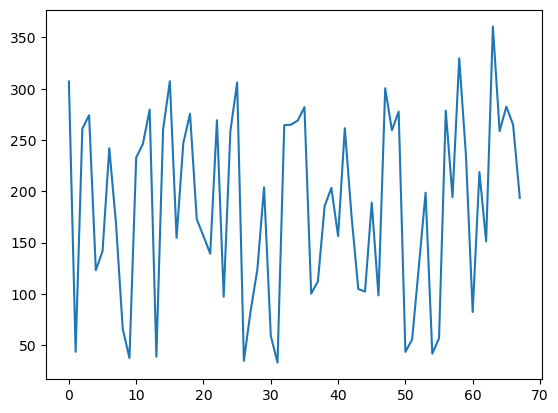

In [199]:
plt.plot(df.loc[df["cut"]=="dca", "triplet ID"], df.loc[df["cut"]=="dca","mean"])

In [200]:
# encoding the triplets
layerPairs = [
      0, 1, 0, 4, 0, 7,              # BPIX1 (3)
      1, 2, 1, 4, 1, 7,              # BPIX2 (6)
      4, 5, 7, 8,                    # FPIX1 (8)
      2, 3, 2, 4, 2, 7, 5, 6, 8, 9,  # BPIX3 & FPIX2 (13)
      0, 2, 1, 3,                    # Jumping Barrel (15)
      0, 5, 0, 8,                    # Jumping Forward (BPIX1,FPIX2)
      4, 6, 7, 9,                     # Jumping Forward (19)
      3, 10,                          # BPIX4 (20)
      4, 10, 5, 10, 6, 10,            # Pixel Positive Endcap (23)
      7, 10, 8, 10, 9, 10,            # Pixel Negative Endcap (26)
      10, 11,                         # TIB1 (27) 
      2, 10, 3, 11,                   # Jumping from Pixel Barrel (29)
      4, 11, 5, 11, 6, 11,            # Jumping from Pixel Positive Endcap (32)
      7, 11, 8, 11, 9, 11             # Jumping from Pixel Negative Endcap (35)
]

layerTriples = [0, 3, 0, 4, 0, 5, 0, 14, 1, 6, 1, 17, 1, 20, 1, 29, 2, 7, 2, 18, 2, 23, 2, 32, 13, 8, 13, 9, 13, 10, 13, 27, 15, 11, 15, 21, 15, 30, 16, 12, 16, 24, 16, 33, 3, 8, 3, 9, 3, 10, 3, 27, 4, 6, 4, 17, 4, 20, 4, 29, 5, 7, 5, 18, 5, 23, 5, 32, 14, 19, 14, 28, 6, 11, 6, 21, 6, 30, 17, 22, 17, 31, 20, 26, 7, 12, 7, 24, 7, 33, 18, 25, 18, 34, 23, 26, 8, 19, 8, 28, 9, 6, 9, 17, 9, 20, 9, 29, 10, 7, 10, 18, 10, 23, 10, 32, 27, 26, 11, 22, 11, 31, 21, 26, 12, 25, 12, 34, 24, 26, 19, 26, 22, 26, 25, 26]

In [205]:
counter = 0 
triplets = {}
for triplet_index, triplet in enumerate(layerTriples): 
    if (triplet_index % 2 == 0):
        doublet_index_1 = 2 * layerTriples[triplet_index] 
        doublet_index_2 = doublet_index_1 + 1
        [triplet_index + 1]
        triplets[counter] = (layerPairs[doublet_index_1], layerPairs[doublet_index_2], layerTriples[triplet_index + 1])
        counter += 1


# setting up a triplet mask
triplet_mask = []
for i in range(len(triplets)):
    triplet_mask.append(1)

for idx, (key, triplet) in enumerate(triplets.items()):
    if ((10 in triplet) or (11 in triplet)):
        pass
    else:
       triplet_mask[idx] = 0


#setting the layes in the dataframe
for idx, (key, triplet) in enumerate(triplets.items()):
    df.loc[df["triplet ID"] == idx, "layer 1"] = triplet[0]
    df.loc[df["triplet ID"] == idx, "layer 2"] = triplet[1]
    df.loc[df["triplet ID"] == idx, "layer 3"] = triplet[2]


In [206]:
hasStrip = (df["layer 2"] == 10) | (df["layer 2"] == 11) | (df["layer 3"] == 10) | (df["layer 3"] == 11)
hasNoStrip =  (df["layer 2"] != 10) & (df["layer 2"] != 11) & (df["layer 3"] != 10) & (df["layer 3"] != 11)

In [207]:
df[hasStrip & (df["entries"] > 30) & (df["cut"] == "dca")]

,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3
14,dca,1189.0,260.468434,287.648412,14,0,2,10
16,dca,126.0,154.621239,257.715430,16,0,5,11
24,dca,1235.0,258.858273,286.822324,24,1,2,10
41,dca,667.0,261.520342,239.759809,41,4,10,26
47,dca,533.0,300.515088,278.639307,47,7,10,26
58,dca,16270.0,329.702100,287.424481,58,2,10,26
61,dca,239.0,218.747990,193.073898,61,5,10,26
64,dca,152.0,258.699089,247.677825,64,8,10,26
65,dca,8078.0,282.557806,275.763601,65,3,10,26
66,dca,244.0,265.072179,215.468294,66,6,10,26


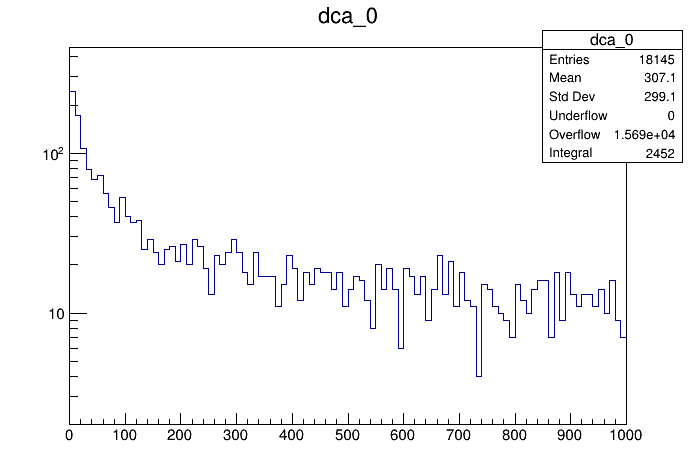

In [212]:
c = ROOT.TCanvas()
histograms["dca_0"].Draw()
ROOT.gStyle.SetOptStat(1111111)
c.SetLogy()
c.Draw()

In [209]:
df[hasNoStrip & (df["entries"] > 0) & (df["cut"] == "dca")]

,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3
0,dca,18145.0,307.095554,299.138747,0,0,1,3
1,dca,1317.0,43.500698,114.089459,1,0,1,4
2,dca,2422.0,261.053850,278.724862,2,0,1,5
3,dca,7936.0,274.173279,287.122306,3,0,1,14
4,dca,568.0,123.013514,221.820776,4,0,4,6
5,dca,489.0,141.566125,226.076421,5,0,4,17
6,dca,2713.0,241.980958,284.514783,6,0,4,20
7,dca,689.0,168.677683,218.063204,7,0,4,29
8,dca,32.0,65.774119,118.393318,8,0,7,7
9,dca,66.0,37.387354,64.644757,9,0,7,18


In [210]:
#adding a figure of merit:
df["FoM"] = df["mean"] + df["std dev"]

In [213]:
#How many events survive the FoM cut?

fom_efficiency = []
for index, row in df.iterrows():
    hist_name = row["cut"] + "_" + str(row["triplet ID"])
    fom = row["FoM"]
    n = histograms[hist_name].Integral(0, int(histograms[hist_name].FindFixBin(fom)))
    d = histograms[hist_name].Integral(0, int(histograms[hist_name].FindFixBin(5000)))
    fom_efficiency.append(n/d)

df["FoM efficiency"] = fom_efficiency

df


,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3,FoM,FoM efficiency
0,dca,18145.0,307.095554,299.138747,0,0,1,3,606.234301,0.107523
1,dca,1317.0,43.500698,114.089459,1,0,1,4,157.590156,0.104024
2,dca,2422.0,261.053850,278.724862,2,0,1,5,539.778712,0.177952
3,dca,7936.0,274.173279,287.122306,3,0,1,14,561.295585,0.147051
4,dca,568.0,123.013514,221.820776,4,0,4,6,344.834290,0.146127
...,...,...,...,...,...,...,...,...,...,...
131,theta,31.0,1.077724,0.821099,63,8,9,34,1.898823,0.806452
132,theta,152.0,0.616759,0.601291,64,8,10,26,1.218050,0.855263
133,theta,8078.0,0.027615,0.170219,65,3,10,26,0.197834,0.912478
134,theta,244.0,0.699862,0.645483,66,6,10,26,1.345345,0.844262
